In [ ]:
# Complete Enterprise Scientific Discovery System - Colab Fixed
# Handles common Colab installation issues

# ================================================================================================
# SECTION 1: ROBUST ENVIRONMENT SETUP & INSTALLATIONS
# ================================================================================================

print("🚀 Setting up Enterprise Scientific Discovery Environment for A100...")

# Install core dependencies with fixed versions
print("📦 Installing core packages...")
!pip install -q transformers>=4.36.0 accelerate>=0.24.0 bitsandbytes>=0.41.0
!pip install -q scikit-learn pandas numpy matplotlib seaborn
!pip install -q networkx scipy sympy
!pip install -q openai anthropic google-generativeai
!pip install -q aiohttp asyncio-throttle
!pip install -q requests beautifulsoup4 lxml
!pip install -q sentencepiece protobuf

# Install Hyperon/MeTTa
print("🧮 Installing Hyperon/MeTTa...")
!pip install -q hyperon

# Skip problematic installations and use alternatives
print("⚡ Setting up A100 optimizations...")
# Skip flash-attn if it fails - use eager attention instead
# Skip xformers if problematic - transformers has built-in optimizations

# Try mounting Google Drive - skip if it fails
print("💾 Attempting to mount Google Drive...")
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    DRIVE_AVAILABLE = True
    print("✅ Google Drive mounted successfully")
except Exception as e:
    print(f"⚠️ Google Drive mounting failed: {e}")
    print("📁 Continuing without Google Drive - results will be displayed only")
    DRIVE_AVAILABLE = False

# Check GPU capabilities
import torch
print(f"🔥 GPU: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'No GPU'}")
if torch.cuda.is_available():
    print(f"💾 GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
    print(f"⚡ CUDA Version: {torch.version.cuda}")
    print(f"🔧 PyTorch Version: {torch.__version__}")

# Set up API keys (optional for fallback)
import os
from google.colab import userdata

try:
    OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
    ANTHROPIC_API_KEY = userdata.get('ANTHROPIC_API_KEY')
    GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
    print("✅ API keys loaded from secrets (available as fallback)")
except:
    print("ℹ️ API keys not found - using local models only")
    OPENAI_API_KEY = None
    ANTHROPIC_API_KEY = None
    GOOGLE_API_KEY = None

print("✅ Environment setup complete!")
print()

# ================================================================================================
# SECTION 2: IMPORT DEPENDENCIES
# ================================================================================================

from transformers import (
    AutoTokenizer, AutoModelForCausalLM, pipeline,
    BitsAndBytesConfig, GenerationConfig
)
from hyperon import MeTTa
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter, deque
from typing import Dict, List, Tuple, Any, Optional, Union
import random
import uuid
import copy
import json
import time
import re
import asyncio
import aiohttp
from dataclasses import dataclass, field
from concurrent.futures import ThreadPoolExecutor
import requests
from datetime import datetime
import gc
import warnings
warnings.filterwarnings('ignore')

# ================================================================================================
# SECTION 3: ROBUST A100-OPTIMIZED LLM ARCHITECTURE
# ================================================================================================

@dataclass
class ScientificModel:
    """Configuration for scientific AI models"""
    name: str
    model_id: str
    specialization: List[str]
    reasoning_capability: str
    max_tokens: int
    quantization: str = "none"
    available: bool = True
    fallback_model: Optional[str] = None

class RobustA100ScientificLLM:
    """Robust A100-optimized LLM system that handles Colab issues"""

    def __init__(self, force_local: bool = True):
        self.force_local = force_local
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        print(f"🧠 Initializing Robust A100-Optimized Scientific LLM Engine")
        print(f"🔥 Device: {self.device}")

        self.setup_robust_model_architecture()
        self.setup_scientific_agents()

        print("✅ Robust A100 Scientific LLM engine ready")

    def setup_robust_model_architecture(self):
        """Setup robust model loading with proper fallbacks"""

        print("🌟 Loading cutting-edge models with robust fallbacks...")

        # Curated models that work well on Colab
        self.model_candidates = [
            {
                'name': 'Qwen2.5-14B-Instruct',
                'model_id': 'Qwen/Qwen2.5-14B-Instruct',
                'quantization': '8bit',
                'description': 'Qwen 2.5 14B - excellent scientific reasoning (reliable on Colab)'
            },
            {
                'name': 'Llama-3.1-8B-Instruct',
                'model_id': 'meta-llama/Meta-Llama-3.1-8B-Instruct',
                'quantization': '8bit',
                'description': 'Llama 3.1 8B - proven performance and stability'
            },
            {
                'name': 'Mistral-7B-Instruct-v0.3',
                'model_id': 'mistralai/Mistral-7B-Instruct-v0.3',
                'quantization': '8bit',
                'description': 'Mistral 7B - reliable instruction following'
            },
            {
                'name': 'microsoft/DialoGPT-large',
                'model_id': 'microsoft/DialoGPT-large',
                'quantization': '16bit',
                'description': 'DialoGPT Large - fast fallback option'
            }
        ]

        self.load_best_available_model_robust()

    def load_best_available_model_robust(self):
        """Robust model loading with extensive error handling"""

        for model_config in self.model_candidates:
            try:
                print(f"🔄 Attempting to load {model_config['name']}...")
                print(f"   {model_config['description']}")

                # Clear memory before each attempt
                if hasattr(self, 'model'):
                    del self.model
                if hasattr(self, 'tokenizer'):
                    del self.tokenizer
                torch.cuda.empty_cache()
                gc.collect()

                # Configure quantization robustly
                bnb_config = None
                torch_dtype = torch.float16

                if model_config['quantization'] == '8bit' and torch.cuda.is_available():
                    try:
                        bnb_config = BitsAndBytesConfig(
                            load_in_8bit=True,
                            bnb_8bit_use_double_quant=True,
                            bnb_8bit_quant_type="nf8",
                            bnb_8bit_compute_dtype=torch.bfloat16 if torch.cuda.is_bf16_supported() else torch.float16
                        )
                        torch_dtype = torch.bfloat16 if torch.cuda.is_bf16_supported() else torch.float16
                    except Exception as e:
                        print(f"   ⚠️ 8-bit quantization failed, using 16-bit: {e}")
                        bnb_config = None

                # Load tokenizer with error handling
                try:
                    self.tokenizer = AutoTokenizer.from_pretrained(
                        model_config['model_id'],
                        trust_remote_code=True,
                        use_fast=True
                    )
                except Exception as e:
                    print(f"   ⚠️ Fast tokenizer failed, using slow: {e}")
                    self.tokenizer = AutoTokenizer.from_pretrained(
                        model_config['model_id'],
                        trust_remote_code=True,
                        use_fast=False
                    )

                # Load model with robust settings
                model_kwargs = {
                    'torch_dtype': torch_dtype,
                    'trust_remote_code': True,
                    'low_cpu_mem_usage': True
                }

                if torch.cuda.is_available():
                    model_kwargs['device_map'] = "auto"
                    if bnb_config:
                        model_kwargs['quantization_config'] = bnb_config

                self.model = AutoModelForCausalLM.from_pretrained(
                    model_config['model_id'],
                    **model_kwargs
                )

                # Setup tokenizer padding
                if self.tokenizer.pad_token is None:
                    if self.tokenizer.eos_token:
                        self.tokenizer.pad_token = self.tokenizer.eos_token
                    else:
                        self.tokenizer.add_special_tokens({'pad_token': '[PAD]'})
                        self.model.resize_token_embeddings(len(self.tokenizer))

                # Create generation pipeline with error handling
                try:
                    pipeline_kwargs = {
                        "model": self.model,
                        "tokenizer": self.tokenizer,
                        "torch_dtype": torch_dtype,
                        "trust_remote_code": True
                    }

                    if torch.cuda.is_available():
                        pipeline_kwargs["device_map"] = "auto"

                    self.science_generator = pipeline(
                        "text-generation",
                        **pipeline_kwargs
                    )
                except Exception as e:
                    print(f"   ⚠️ Pipeline creation issue: {e}")
                    # Create a simple pipeline fallback
                    self.science_generator = pipeline(
                        "text-generation",
                        model=self.model,
                        tokenizer=self.tokenizer
                    )

                # Setup generation config
                self.generation_config = GenerationConfig(
                    do_sample=True,
                    temperature=0.7,
                    top_p=0.9,
                    top_k=50,
                    repetition_penalty=1.1,
                    length_penalty=1.0,
                    no_repeat_ngram_size=3,
                    pad_token_id=self.tokenizer.pad_token_id,
                    eos_token_id=self.tokenizer.eos_token_id
                )

                self.current_model = model_config['name']
                self.current_model_config = model_config

                print(f"✅ Successfully loaded {model_config['name']}")
                if torch.cuda.is_available():
                    print(f"🔥 Memory allocated: {torch.cuda.memory_allocated()/1e9:.1f} GB")
                print(f"⚡ Quantization: {model_config['quantization']}")
                break

            except Exception as e:
                print(f"⚠️ Failed to load {model_config['name']}: {e}")
                continue

        if not hasattr(self, 'model'):
            raise RuntimeError("Failed to load any model. Please check your GPU memory and try restarting the runtime.")

    def setup_scientific_agents(self):
        """Setup multi-agent scientific reasoning system"""

        self.scientific_agents = {
            'theorist': {
                'role': 'Generate novel theoretical frameworks and mechanisms',
                'expertise': ['theoretical_physics', 'abstract_reasoning', 'model_building'],
                'system_prompt': 'You are a world-class theoretical scientist. Generate novel, testable scientific hypotheses with specific mechanisms.',
                'temperature': 0.8
            },
            'experimentalist': {
                'role': 'Design experiments and predict observable phenomena',
                'expertise': ['experimental_design', 'measurement', 'validation'],
                'system_prompt': 'You are an expert experimentalist. Focus on testable predictions and observable phenomena.',
                'temperature': 0.7
            },
            'mathematician': {
                'role': 'Provide mathematical formulation and analysis',
                'expertise': ['mathematical_modeling', 'equations', 'quantitative_analysis'],
                'system_prompt': 'You are a mathematical physicist. Provide rigorous mathematical formulations of scientific concepts.',
                'temperature': 0.6
            },
            'critic': {
                'role': 'Critical analysis and identification of flaws',
                'expertise': ['critical_thinking', 'error_detection', 'logical_analysis'],
                'system_prompt': 'You are a scientific critic. Analyze and improve scientific hypotheses with rigorous logic.',
                'temperature': 0.5
            },
            'synthesizer': {
                'role': 'Integrate multiple perspectives into coherent hypotheses',
                'expertise': ['synthesis', 'integration', 'coherence'],
                'system_prompt': 'You are a scientific synthesizer. Integrate multiple perspectives into coherent, breakthrough hypotheses.',
                'temperature': 0.7
            }
        }

    def generate_scientific_hypothesis(self,
                                     seed_concept: str,
                                     domain: str,
                                     agent_type: str = 'theorist',
                                     complexity: str = 'advanced') -> str:
        """Generate scientific hypothesis using robust methods"""

        agent_config = self.scientific_agents[agent_type]

        # Create robust prompt based on available model
        if 'Qwen' in self.current_model:
            prompt = self.create_qwen_prompt(seed_concept, domain, agent_config, complexity)
        elif 'Llama' in self.current_model:
            prompt = self.create_llama_prompt(seed_concept, domain, agent_config, complexity)
        elif 'Mistral' in self.current_model:
            prompt = self.create_mistral_prompt(seed_concept, domain, agent_config, complexity)
        else:
            prompt = self.create_general_prompt(seed_concept, domain, agent_config, complexity)

        return self.generate_with_model_robust(prompt, agent_config['temperature'])

    def create_qwen_prompt(self, seed_concept: str, domain: str, agent_config: dict, complexity: str) -> str:
        """Create optimized prompt for Qwen models"""
        return f"""<|im_start|>system
{agent_config['system_prompt']} Focus on {domain} domain with {complexity} level analysis.
<|im_end|>
<|im_start|>user
Based on the concept: "{seed_concept}"

Generate a novel scientific hypothesis in {domain} that:
1. Proposes a specific, testable mechanism
2. Makes quantitative predictions
3. Could lead to breakthrough discoveries
4. Uses precise scientific terminology

Provide exactly one coherent hypothesis (1-2 sentences):
<|im_end|>
<|im_start|>assistant
"""

    def create_llama_prompt(self, seed_concept: str, domain: str, agent_config: dict, complexity: str) -> str:
        """Create optimized prompt for Llama models"""
        return f"""<|begin_of_text|><|start_header_id|>system<|end_header_id|>
{agent_config['system_prompt']} Focus on {domain} domain with {complexity} level analysis.<|eot_id|>

<|start_header_id|>user<|end_header_id|>
Based on the concept: "{seed_concept}"

Generate a novel scientific hypothesis in {domain} that:
1. Proposes a specific, testable mechanism
2. Makes quantitative predictions
3. Could lead to breakthrough discoveries
4. Uses precise scientific terminology

Provide exactly one coherent hypothesis (1-2 sentences):<|eot_id|>

<|start_header_id|>assistant<|end_header_id|>
"""

    def create_mistral_prompt(self, seed_concept: str, domain: str, agent_config: dict, complexity: str) -> str:
        """Create optimized prompt for Mistral models"""
        return f"""[INST] {agent_config['system_prompt']} Focus on {domain} domain with {complexity} level analysis.

Based on the concept: "{seed_concept}"

Generate a novel scientific hypothesis in {domain} that:
1. Proposes a specific, testable mechanism
2. Makes quantitative predictions
3. Could lead to breakthrough discoveries
4. Uses precise scientific terminology

Provide exactly one coherent hypothesis (1-2 sentences): [/INST]
"""

    def create_general_prompt(self, seed_concept: str, domain: str, agent_config: dict, complexity: str) -> str:
        """Create general prompt for other models"""
        return f"""### System: {agent_config['system_prompt']} Focus on {domain} domain with {complexity} level analysis.

### Human: Based on the concept: "{seed_concept}"

Generate a novel scientific hypothesis in {domain} that:
1. Proposes a specific, testable mechanism
2. Makes quantitative predictions
3. Could lead to breakthrough discoveries
4. Uses precise scientific terminology

Provide exactly one coherent hypothesis (1-2 sentences):

### Assistant: """

    def generate_with_model_robust(self, prompt: str, temperature: float = 0.7) -> str:
        """Robust generation with extensive error handling"""

        try:
            # Update generation config
            self.generation_config.temperature = temperature
            self.generation_config.max_new_tokens = 150

            # Try generation with pipeline
            generated = self.science_generator(
                prompt,
                generation_config=self.generation_config,
                return_full_text=False,
                clean_up_tokenization_spaces=True
            )

            hypothesis = generated[0]['generated_text'].strip()
            return self.clean_scientific_hypothesis(hypothesis)

        except Exception as e:
            print(f"⚠️ Pipeline generation failed: {e}")
            try:
                # Fallback to direct model generation
                inputs = self.tokenizer(prompt, return_tensors="pt", truncation=True, max_length=512)
                if torch.cuda.is_available():
                    inputs = {k: v.to(self.device) for k, v in inputs.items()}

                with torch.no_grad():
                    outputs = self.model.generate(
                        **inputs,
                        max_new_tokens=150,
                        temperature=temperature,
                        do_sample=True,
                        top_p=0.9,
                        pad_token_id=self.tokenizer.eos_token_id
                    )

                generated_text = self.tokenizer.decode(outputs[0], skip_special_tokens=True)
                hypothesis = generated_text[len(prompt):].strip()
                return self.clean_scientific_hypothesis(hypothesis)

            except Exception as e2:
                print(f"⚠️ Direct generation failed: {e2}")
                return self.fallback_generation(prompt)

    def clean_scientific_hypothesis(self, generated: str) -> str:
        """Clean and validate generated scientific hypothesis"""

        # Remove common artifacts and formatting
        generated = generated.replace('<|im_end|>', '').replace('<|eot_id|>', '')
        generated = re.sub(r'###\s*\w+:', '', generated)
        generated = re.sub(r'\[INST\]|\[/INST\]', '', generated)
        generated = re.sub(r'<\|.*?\|>', '', generated)

        # Split into sentences and find the best scientific statement
        sentences = [s.strip() for s in generated.split('.') if s.strip()]

        for sentence in sentences:
            if (len(sentence) > 25 and
                len(sentence.split()) > 8 and
                len(sentence.split()) < 50 and
                not sentence.lower().startswith(('here', 'this', 'the hypothesis', 'i propose', 'based on'))):

                clean_sentence = sentence.strip()
                if not clean_sentence.endswith('.'):
                    clean_sentence += '.'

                return clean_sentence

        # Fallback processing
        if len(generated) > 30:
            text = generated[:200].strip()
            if not text.endswith('.'):
                last_period = text.rfind('.')
                if last_period > 20:
                    text = text[:last_period + 1]
                else:
                    text += '.'
            return text

        return "Novel mechanisms in complex systems exhibit emergent properties through multi-scale interactions."

    def fallback_generation(self, prompt: str) -> str:
        """High-quality fallback generation"""
        concepts = re.findall(r'"([^"]*)"', prompt)
        key_concept = concepts[0] if concepts else "complex systems"

        fallback_hypotheses = [
            f"Quantum coherence effects in {key_concept} create emergent collective phenomena through non-local correlations.",
            f"Self-organizing criticality in {key_concept} enables adaptive responses through hierarchical feedback mechanisms.",
            f"Topological protection mechanisms in {key_concept} exhibit universal scaling behavior across organizational levels.",
            f"Information-theoretic constraints in {key_concept} drive optimization through distributed error correction networks.",
            f"Phase transitions in {key_concept} demonstrate critical phenomena through multi-scale coupling dynamics.",
            f"Emergent intelligence in {key_concept} arises from distributed information processing across network hierarchies."
        ]

        return random.choice(fallback_hypotheses)

# ================================================================================================
# SECTION 4: ROBUST DISCOVERY SYSTEM
# ================================================================================================

@dataclass
class EnterpriseHypothesis:
    """Enterprise-grade scientific hypothesis with full metadata"""
    id: str
    content: str
    domain: str
    generation: int

    # Quality scores
    scientific_rigor: float = 0.0
    novelty_score: float = 0.0
    testability_score: float = 0.0
    coherence_score: float = 0.0
    combined_score: float = 0.0

    # Scientific metadata
    mathematical_formulation: Optional[str] = None
    experimental_predictions: List[str] = field(default_factory=list)
    theoretical_framework: str = ""
    cited_literature: List[str] = field(default_factory=list)

    # Discovery metadata
    generation_agent: str = ""
    mutation_history: List[str] = field(default_factory=list)
    breakthrough_indicators: Dict[str, float] = field(default_factory=dict)

    # Validation metadata
    peer_review_score: float = 0.0
    reproducibility_score: float = 0.0
    impact_potential: float = 0.0

class RobustA100DiscoverySystem:
    """Robust A100-optimized enterprise scientific discovery system"""

    def __init__(self, force_local: bool = True):
        print("🌟 Initializing Robust A100-Optimized Scientific Discovery System")
        print("=" * 80)

        # Initialize robust LLM engine
        self.llm_engine = RobustA100ScientificLLM(force_local)

        # Initialize core systems
        self.setup_evaluation_system()
        self.setup_knowledge_integration()
        self.setup_discovery_engine()

        # Discovery state
        self.hypothesis_population = []
        self.discovery_timeline = []
        self.breakthrough_discoveries = []
        self.knowledge_archive = {}

        print("✅ Robust A100-optimized discovery system ready!")

    def setup_evaluation_system(self):
        """Setup robust evaluation system"""
        print("📊 Setting up robust evaluation system...")

        # MeTTa symbolic reasoning with error handling
        try:
            self.metta = MeTTa()

            symbolic_knowledge = '''
            ; Scientific hypothesis analysis patterns
            (= (analyze-scientific-rigor (hypothesis-with-mechanism $mechanism))
               (rigor-score very-high)
               (testability high))

            (= (analyze-scientific-rigor (quantitative-hypothesis $prediction))
               (rigor-score high)
               (testability very-high))

            (= (evaluate-novelty (cross-domain-insight $d1 $d2))
               (novelty-level very-high)
               (breakthrough-potential high))
            '''

            self.metta.run(symbolic_knowledge)
            print("✅ Symbolic evaluation system loaded")
        except Exception as e:
            print(f"⚠️ MeTTa setup issue: {e} - using rule-based evaluation")
            self.metta = None

        # Pattern mining setup
        self.scientific_tfidf = TfidfVectorizer(
            max_features=5000,
            stop_words='english',
            ngram_range=(1, 4),
            min_df=1,
            max_df=0.9
        )

        self.hypothesis_clusterer = DBSCAN(eps=0.3, min_samples=2)

        print("✅ Robust evaluation system ready")

    def setup_knowledge_integration(self):
        """Setup knowledge integration"""
        print("🌐 Setting up knowledge integration...")

        self.knowledge_sources = {
            'cutting_edge_research': {'type': 'latest_preprints', 'quality': 'very_high'},
            'cross_domain_insights': {'type': 'interdisciplinary', 'quality': 'high'},
            'quantum_information': {'type': 'quantum_physics', 'quality': 'very_high'},
            'complexity_science': {'type': 'complex_systems', 'quality': 'high'}
        }

        self.domain_expertise = {
            'quantum_physics': ['quantum_computing', 'quantum_information', 'many_body_systems'],
            'neuroscience': ['brain_networks', 'neural_computation', 'consciousness_studies'],
            'materials_science': ['quantum_materials', '2d_materials', 'metamaterials'],
            'biology': ['systems_biology', 'synthetic_biology', 'evolutionary_dynamics'],
            'physics': ['condensed_matter', 'statistical_mechanics', 'field_theory']
        }

        print("✅ Knowledge integration ready")

    def setup_discovery_engine(self):
        """Setup discovery engine"""
        print("🔬 Setting up discovery engine...")

        self.discovery_params = {
            'novelty_threshold': 0.75,
            'rigor_threshold': 0.8,
            'breakthrough_threshold': 0.85,
            'max_archive_size': 10000,
            'diversity_pressure': 0.7
        }

        self.discovery_agents = {
            'theorist': {'weight': 1.2, 'specialty': 'novel_mechanisms'},
            'experimentalist': {'weight': 1.1, 'specialty': 'testable_predictions'},
            'mathematician': {'weight': 1.3, 'specialty': 'quantitative_models'},
            'critic': {'weight': 1.0, 'specialty': 'rigor_analysis'},
            'synthesizer': {'weight': 1.15, 'specialty': 'integration'}
        }

        print("✅ Discovery engine ready")

    def create_enterprise_hypothesis(self, content: str, domain: str, agent: str) -> EnterpriseHypothesis:
        """Create enterprise hypothesis with evaluation"""

        hypothesis = EnterpriseHypothesis(
            id=f"robust_{uuid.uuid4().hex[:12]}",
            content=content,
            domain=domain,
            generation=len(self.discovery_timeline),
            generation_agent=agent
        )

        hypothesis = self.evaluate_hypothesis_robust(hypothesis)
        return hypothesis

    def evaluate_hypothesis_robust(self, hypothesis: EnterpriseHypothesis) -> EnterpriseHypothesis:
        """Robust hypothesis evaluation"""

        try:
            # Multi-dimensional evaluation
            rigor_score = self.evaluate_scientific_rigor(hypothesis.content)
            novelty_score = self.evaluate_novelty_robust(hypothesis)
            testability_score = self.evaluate_testability(hypothesis.content)
            coherence_score = self.evaluate_coherence(hypothesis.content)

            # Weighted combination
            agent_weight = self.discovery_agents.get(hypothesis.generation_agent, {'weight': 1.0})['weight']

            combined_score = (
                rigor_score * 0.32 * agent_weight +
                novelty_score * 0.28 +
                testability_score * 0.25 +
                coherence_score * 0.15
            )

            # Update hypothesis
            hypothesis.scientific_rigor = rigor_score
            hypothesis.novelty_score = novelty_score
            hypothesis.testability_score = testability_score
            hypothesis.coherence_score = coherence_score
            hypothesis.combined_score = min(combined_score, 100.0)

            # Breakthrough detection
            hypothesis.breakthrough_indicators = self.detect_breakthrough_indicators(hypothesis)

        except Exception as e:
            print(f"⚠️ Evaluation error: {e}")
            # Fallback scoring
            hypothesis.scientific_rigor = 70.0
            hypothesis.novelty_score = 75.0
            hypothesis.testability_score = 70.0
            hypothesis.coherence_score = 80.0
            hypothesis.combined_score = 73.75
            hypothesis.breakthrough_indicators = {'overall_breakthrough_potential': 60.0}

        return hypothesis

    def evaluate_scientific_rigor(self, content: str) -> float:
        """Evaluate scientific rigor"""

        score = 45.0
        content_lower = content.lower()

        rigor_indicators = {
            'mechanism': 18, 'quantitative': 16, 'mathematical': 15,
            'emergent': 12, 'systematic': 12, 'prediction': 16,
            'hypothesis': 10, 'model': 10, 'principle': 8
        }

        for indicator, points in rigor_indicators.items():
            if indicator in content_lower:
                score += points

        return min(score, 100.0)

    def evaluate_novelty_robust(self, hypothesis: EnterpriseHypothesis) -> float:
        """Robust novelty evaluation"""

        if not self.knowledge_archive:
            return 85.0

        try:
            content_words = set(hypothesis.content.lower().split())

            similarities = []
            for archived_id, archived_hyp in self.knowledge_archive.items():
                archived_words = set(archived_hyp.content.lower().split())
                if len(content_words.union(archived_words)) > 0:
                    similarity = len(content_words.intersection(archived_words)) / len(content_words.union(archived_words))
                    similarities.append(similarity)

            max_similarity = max(similarities) if similarities else 0.0
            base_novelty = (1 - max_similarity) * 100

            # Novelty bonuses
            novel_concepts = ['quantum', 'emergent', 'topological', 'criticality', 'coherence']
            concept_bonus = min(sum(5 for concept in novel_concepts if concept in hypothesis.content.lower()), 20)

            return min(base_novelty + concept_bonus, 100.0)

        except Exception as e:
            print(f"⚠️ Novelty evaluation error: {e}")
            return 80.0

    def evaluate_testability(self, content: str) -> float:
        """Evaluate testability"""

        score = 35.0
        content_lower = content.lower()

        testability_indicators = {
            'measurable': 18, 'observable': 18, 'testable': 15,
            'experimental': 15, 'prediction': 20, 'detect': 12,
            'quantify': 12, 'validate': 10
        }

        for indicator, points in testability_indicators.items():
            if indicator in content_lower:
                score += points

        return min(score, 100.0)

    def evaluate_coherence(self, content: str) -> float:
        """Evaluate coherence"""

        score = 45.0

        # Length appropriateness
        word_count = len(content.split())
        if 25 <= word_count <= 60:
            score += 20
        elif word_count < 15:
            score -= 20

        # Scientific terminology
        scientific_terms = ['hypothesis', 'mechanism', 'theory', 'model', 'principle']
        term_bonus = min(sum(3 for term in scientific_terms if term in content.lower()), 15)
        score += term_bonus

        return min(score, 100.0)

    def detect_breakthrough_indicators(self, hypothesis: EnterpriseHypothesis) -> Dict[str, float]:
        """Detect breakthrough indicators"""

        indicators = {}
        content = hypothesis.content.lower()

        # Various breakthrough indicators
        paradigm_terms = ['fundamental', 'revolutionary', 'breakthrough', 'novel']
        indicators['paradigm_shift'] = min(sum(12 for term in paradigm_terms if term in content), 40)

        unification_terms = ['unify', 'integrate', 'connect', 'bridge']
        indicators['unification_potential'] = min(sum(10 for term in unification_terms if term in content), 35)

        math_terms = ['equation', 'model', 'mathematical', 'quantitative']
        indicators['mathematical_sophistication'] = min(sum(8 for term in math_terms if term in content), 30)

        total_potential = sum(min(score, 30) for score in indicators.values())
        indicators['overall_breakthrough_potential'] = min(total_potential, 100)

        return indicators

    def mutate_hypothesis_robust(self, parent: EnterpriseHypothesis) -> EnterpriseHypothesis:
        """Robust hypothesis mutation"""

        # Intelligent agent selection
        if parent.scientific_rigor < 75:
            agent = 'critic'
        elif parent.novelty_score < 75:
            agent = 'theorist'
        elif parent.testability_score < 75:
            agent = 'experimentalist'
        else:
            agents = list(self.discovery_agents.keys())
            weights = [self.discovery_agents[agent]['weight'] for agent in agents]
            agent = random.choices(agents, weights=weights)[0]

        print(f"🧬 Robust mutation with {agent} (parent: {parent.combined_score:.1f})")

        try:
            # Generate enhanced hypothesis
            enhanced_content = self.llm_engine.generate_scientific_hypothesis(
                seed_concept=parent.content,
                domain=parent.domain,
                agent_type=agent,
                complexity='advanced'
            )

            # Create offspring
            offspring = EnterpriseHypothesis(
                id=f"gen{parent.generation + 1}_{agent}_{uuid.uuid4().hex[:8]}",
                content=enhanced_content,
                domain=parent.domain,
                generation=parent.generation + 1,
                generation_agent=agent,
                mutation_history=parent.mutation_history + [f"{agent}_enhancement"]
            )

            offspring = self.evaluate_hypothesis_robust(offspring)
            return offspring

        except Exception as e:
            print(f"⚠️ Mutation error: {e}")
            # Return a slightly modified parent as fallback
            fallback_content = parent.content.replace("exhibit", "demonstrate").replace("through", "via")
            return self.create_enterprise_hypothesis(fallback_content, parent.domain, agent)

    def run_robust_discovery(self,
                            seed_concepts: List[str],
                            domains: List[str],
                            generations: int = 12,
                            population_size: int = 16) -> Dict[str, Any]:
        """Run robust scientific discovery process"""

        print("🌟 Starting Robust A100-Optimized Scientific Discovery")
        print("=" * 80)
        if torch.cuda.is_available():
            print(f"🔥 GPU: {torch.cuda.get_device_name(0)}")
        print(f"🧠 Model: {self.llm_engine.current_model}")
        print(f"🎯 {len(seed_concepts)} seed concepts across {len(domains)} domains")
        print(f"📊 {generations} generations, population size {population_size}")
        print()

        # Initialize population
        agents = list(self.discovery_agents.keys())
        for i, seed_concept in enumerate(seed_concepts):
            domain = domains[i % len(domains)]
            agent = agents[i % len(agents)]

            print(f"🌱 Initializing with {agent} in {domain}...")

            try:
                enhanced_concept = self.llm_engine.generate_scientific_hypothesis(
                    seed_concept, domain, agent, 'advanced'
                )

                hypothesis = self.create_enterprise_hypothesis(enhanced_concept, domain, agent)
                self.hypothesis_population.append(hypothesis)
                self.knowledge_archive[hypothesis.id] = hypothesis
            except Exception as e:
                print(f"⚠️ Initialization error for {seed_concept}: {e}")
                # Create fallback hypothesis
                fallback_content = f"Novel mechanisms in {seed_concept} exhibit emergent properties through systematic interactions."
                hypothesis = self.create_enterprise_hypothesis(fallback_content, domain, agent)
                self.hypothesis_population.append(hypothesis)
                self.knowledge_archive[hypothesis.id] = hypothesis

        # Fill population to desired size
        while len(self.hypothesis_population) < population_size:
            parent = random.choice(self.hypothesis_population)
            offspring = self.mutate_hypothesis_robust(parent)
            self.hypothesis_population.append(offspring)
            self.knowledge_archive[offspring.id] = offspring

        # Discovery evolution loop
        for generation in range(generations):
            print(f"🧬 Generation {generation + 1}/{generations}")

            try:
                # Pattern discovery
                patterns = self.discover_patterns_robust()
                if patterns:
                    print(f"🔍 Discovered {len(patterns)} patterns")

                # Selection and sorting
                self.hypothesis_population.sort(key=lambda h: h.combined_score, reverse=True)

                # Breakthrough detection
                breakthroughs = [h for h in self.hypothesis_population
                               if h.breakthrough_indicators.get('overall_breakthrough_potential', 0) >= 70]

                if breakthroughs:
                    print(f"💡 {len(breakthroughs)} breakthrough candidates!")
                    new_breakthroughs = [b for b in breakthroughs if b not in self.breakthrough_discoveries]
                    self.breakthrough_discoveries.extend(new_breakthroughs)

                # Elite preservation
                elite_size = max(4, population_size // 3)
                elite = self.hypothesis_population[:elite_size]

                # Generate new population
                new_population = elite.copy()

                while len(new_population) < population_size:
                    parent = random.choice(self.hypothesis_population[:elite_size * 2])
                    offspring = self.mutate_hypothesis_robust(parent)
                    new_population.append(offspring)
                    self.knowledge_archive[offspring.id] = offspring

                self.hypothesis_population = new_population

                # Statistics
                best = max(self.hypothesis_population, key=lambda h: h.combined_score)
                stats = {
                    'generation': generation,
                    'best_score': best.combined_score,
                    'avg_score': np.mean([h.combined_score for h in self.hypothesis_population]),
                    'avg_novelty': np.mean([h.novelty_score for h in self.hypothesis_population]),
                    'avg_rigor': np.mean([h.scientific_rigor for h in self.hypothesis_population]),
                    'breakthroughs': len(breakthroughs),
                    'archive_size': len(self.knowledge_archive)
                }

                self.discovery_timeline.append(stats)

                print(f"📊 Best: {best.combined_score:.1f} | Avg: {stats['avg_score']:.1f} | "
                      f"Novel: {stats['avg_novelty']:.1f} | Rigor: {stats['avg_rigor']:.1f}")
                print(f"🏆 {best.content[:100]}...")

                # Memory management
                if generation % 3 == 0:
                    torch.cuda.empty_cache()
                    gc.collect()

                print()

            except Exception as e:
                print(f"⚠️ Generation {generation} error: {e}")
                continue

        return {
            "final_population": self.hypothesis_population,
            "best_hypothesis": max(self.hypothesis_population, key=lambda h: h.combined_score),
            "breakthrough_discoveries": self.breakthrough_discoveries,
            "discovery_timeline": self.discovery_timeline,
            "knowledge_archive": self.knowledge_archive,
            "total_hypotheses_generated": len(self.knowledge_archive),
            "model_used": self.llm_engine.current_model
        }

    def discover_patterns_robust(self) -> List[Dict]:
        """Robust pattern discovery"""

        try:
            if len(self.hypothesis_population) < 5:
                return []

            high_quality = [h for h in self.hypothesis_population if h.combined_score > 75]
            if len(high_quality) < 3:
                return []

            texts = [h.content for h in high_quality]
            tfidf_matrix = self.scientific_tfidf.fit_transform(texts)

            feature_names = self.scientific_tfidf.get_feature_names_out()
            mean_scores = np.mean(tfidf_matrix.toarray(), axis=0)

            top_indices = np.argsort(mean_scores)[-10:]

            patterns = []
            for idx in top_indices:
                if mean_scores[idx] > 0.1:
                    pattern = {
                        'pattern': feature_names[idx],
                        'importance': mean_scores[idx],
                        'frequency': np.sum(tfidf_matrix[:, idx] > 0)
                    }
                    patterns.append(pattern)

            return patterns

        except Exception as e:
            print(f"⚠️ Pattern discovery error: {e}")
            return []

    def visualize_robust_results(self, results: Dict):
        """Robust visualization"""

        try:
            timeline = results["discovery_timeline"]

            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

            generations = [t['generation'] for t in timeline]
            best_scores = [t['best_score'] for t in timeline]
            avg_scores = [t['avg_score'] for t in timeline]
            novelty_scores = [t['avg_novelty'] for t in timeline]
            rigor_scores = [t['avg_rigor'] for t in timeline]
            breakthroughs = [t['breakthroughs'] for t in timeline]

            # Score evolution
            ax1.plot(generations, best_scores, 'b-o', label='Best Score', linewidth=3)
            ax1.plot(generations, avg_scores, 'r--s', label='Average Score', linewidth=2)
            ax1.fill_between(generations, avg_scores, alpha=0.3, color='red')
            ax1.set_xlabel('Generation')
            ax1.set_ylabel('Combined Score')
            ax1.set_title('Robust Scientific Discovery Evolution', fontweight='bold')
            ax1.legend()
            ax1.grid(True, alpha=0.3)
            ax1.set_ylim(0, 100)

            # Quality dimensions
            ax2.plot(generations, novelty_scores, 'purple', linewidth=2, marker='o', label='Novelty')
            ax2.plot(generations, rigor_scores, 'green', linewidth=2, marker='s', label='Rigor')
            ax2.set_xlabel('Generation')
            ax2.set_ylabel('Quality Score')
            ax2.set_title('Scientific Quality Evolution', fontweight='bold')
            ax2.legend()
            ax2.grid(True, alpha=0.3)
            ax2.set_ylim(0, 100)

            # Breakthrough timeline
            ax3.bar(generations, breakthroughs, color='gold', alpha=0.8)
            ax3.set_xlabel('Generation')
            ax3.set_ylabel('Breakthrough Candidates')
            ax3.set_title('Breakthrough Discovery Timeline', fontweight='bold')
            ax3.grid(True, alpha=0.3, axis='y')

            # Domain distribution
            if results["final_population"]:
                domains = [h.domain for h in results["final_population"]]
                domain_counts = Counter(domains)

                ax4.pie(domain_counts.values(), labels=domain_counts.keys(), autopct='%1.1f%%')
                ax4.set_title('Domain Distribution', fontweight='bold')

            plt.tight_layout()
            plt.show()

            # Results summary
            best = results["best_hypothesis"]
            print("\n" + "=" * 80)
            print("🏆 ROBUST A100-OPTIMIZED DISCOVERY RESULTS")
            print("=" * 80)
            if torch.cuda.is_available():
                print(f"🔥 GPU: {torch.cuda.get_device_name(0)}")
            print(f"🧠 Model: {results['model_used']}")
            print()
            print("📊 BEST HYPOTHESIS SCORES:")
            print(f"   Combined Score: {best.combined_score:.2f}")
            print(f"   Scientific Rigor: {best.scientific_rigor:.2f}")
            print(f"   Novelty Score: {best.novelty_score:.2f}")
            print(f"   Testability Score: {best.testability_score:.2f}")
            print(f"   Coherence Score: {best.coherence_score:.2f}")
            print()
            print(f"📖 BEST HYPOTHESIS:")
            print(f"   {best.content}")
            print()
            print(f"📈 DISCOVERY STATISTICS:")
            print(f"   Breakthrough Candidates: {len(results['breakthrough_discoveries'])}")
            print(f"   Total Hypotheses: {results['total_hypotheses_generated']}")
            print(f"   Final Population Quality: {np.mean([h.combined_score for h in results['final_population']]):.2f}")

        except Exception as e:
            print(f"⚠️ Visualization error: {e}")
            # Simple text summary
            best = results["best_hypothesis"]
            print(f"\n🏆 BEST HYPOTHESIS (Score: {best.combined_score:.1f})")
            print(f"   {best.content}")

# ================================================================================================
# SECTION 5: ROBUST DEMO FUNCTION
# ================================================================================================

def run_robust_a100_discovery_demo():
    """Run the robust A100-optimized scientific discovery system"""

    print("🌟 ROBUST A100-OPTIMIZED SCIENTIFIC DISCOVERY SYSTEM")
    print("=" * 80)
    print("🔧 Handles Colab installation issues gracefully")
    print("🧠 Robust model loading with intelligent fallbacks")
    print("📊 Error-resistant evaluation and generation")
    print("💡 Breakthrough detection with error handling")
    print("🌐 Comprehensive error recovery mechanisms")
    print()

    if torch.cuda.is_available():
        print(f"🔥 GPU: {torch.cuda.get_device_name(0)}")
        print(f"💾 Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
    else:
        print("⚠️ No GPU - using CPU (reduced performance)")
    print()

    try:
        # Initialize robust system
        system = RobustA100DiscoverySystem(force_local=True)

        # Robust seed concepts
        robust_seed_concepts = [
            "Quantum coherence effects in biological macromolecular networks",
            "Information-theoretic principles governing neural network optimization",
            "Self-organizing criticality in materials phase transitions",
            "Emergent collective intelligence in distributed biological systems",
            "Topological protection mechanisms in quantum many-body systems"
        ]

        robust_domains = [
            "quantum_physics",
            "neuroscience",
            "materials_science",
            "biology",
            "physics"
        ]

        print("🚀 Launching Robust Discovery Process...")
        print()

        # Run robust discovery
        results = system.run_robust_discovery(
            seed_concepts=robust_seed_concepts,
            domains=robust_domains,
            generations=10,  # Reduced for stability
            population_size=12  # Reduced for memory efficiency
        )

        # Robust visualization
        system.visualize_robust_results(results)

        # Save results if Drive is available
        if DRIVE_AVAILABLE:
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            results_filename = f"/content/drive/My Drive/robust_discovery_results_{timestamp}.json"

            try:
                serializable_results = {
                    "best_hypothesis": {
                        "content": results["best_hypothesis"].content,
                        "combined_score": results["best_hypothesis"].combined_score,
                        "domain": results["best_hypothesis"].domain
                    },
                    "discovery_timeline": results["discovery_timeline"],
                    "breakthrough_count": len(results["breakthrough_discoveries"]),
                    "model_used": results["model_used"]
                }

                with open(results_filename, 'w') as f:
                    json.dump(serializable_results, f, indent=2)

                print(f"💾 Results saved to: {results_filename}")

            except Exception as e:
                print(f"⚠️ Save error: {e}")

        return results, system

    except Exception as e:
        print(f"❌ System error: {e}")
        print("🔧 Try restarting the runtime and running again")
        return None, None

# ================================================================================================
# SECTION 6: READY TO LAUNCH
# ================================================================================================

print("🌟 ROBUST A100-OPTIMIZED SCIENTIFIC DISCOVERY SYSTEM READY!")
print("=" * 80)
print("✅ Handles flash-attn installation failures")
print("✅ Robust model loading with intelligent fallbacks")
print("✅ Error-resistant hypothesis generation")
print("✅ Graceful Google Drive handling")
print("✅ Memory-optimized for Colab stability")
print("✅ Comprehensive error recovery")
print()
print("🚀 TO LAUNCH THE ROBUST SYSTEM:")
print("   results, system = run_robust_a100_discovery_demo()")
print()
print("🎯 ROBUST SYSTEM FEATURES:")
print("   🔧 Handles common Colab installation issues")
print("   🧠 Intelligent model selection and fallback")
print("   📊 Error-resistant evaluation algorithms")
print("   💾 Memory-efficient population management")
print("   🔍 Robust pattern discovery")
print("   📈 Comprehensive error handling")

if torch.cuda.is_available():
    print(f"\n🔥 Ready to utilize {torch.cuda.get_device_name(0)}!")
else:
    print("\n💻 Ready to run on CPU!")

print("\n🚀 Launch with: results, system = run_robust_a100_discovery_demo()")

🚀 Setting up Enterprise Scientific Discovery Environment for A100...
📦 Installing core packages...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.1/293.1 kB 21.2 MB/s eta 0:00:00
🧮 Installing Hyperon/MeTTa...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 60.4 MB/s eta 0:00:00
⚡ Setting up A100 optimizations...
💾 Attempting to mount Google Drive...
⚠️ Google Drive mounting failed: mount failed
📁 Continuing without Google Drive - results will be displayed only
🔥 GPU: NVIDIA A100-SXM4-40GB
💾 GPU Memory: 42.5 GB
⚡ CUDA Version: 12.4
🔧 PyTorch Version: 2.6.0+cu124
ℹ️ API keys not found - using local models only
✅ Environment setup complete!

🌟 ROBUST A100-OPTIMIZED SCIENTIFIC DISCOVERY SYSTEM READY!
✅ Handles flash-attn installation failures
✅ Robust model loading with intelligent fallbacks
✅ Error-resistant hypothesis generation
✅ Graceful Google Drive handling
✅ Memory-optimized for Colab stability
✅ Comprehensive error recovery

🚀 TO LAUNCH THE ROBUST SYSTEM:
   results, system

🌟 ROBUST A100-OPTIMIZED SCIENTIFIC DISCOVERY SYSTEM
🔧 Handles Colab installation issues gracefully
🧠 Robust model loading with intelligent fallbacks
📊 Error-resistant evaluation and generation
💡 Breakthrough detection with error handling
🌐 Comprehensive error recovery mechanisms

🔥 GPU: NVIDIA A100-SXM4-40GB
💾 Memory: 42.5 GB

🌟 Initializing Robust A100-Optimized Scientific Discovery System
🧠 Initializing Robust A100-Optimized Scientific LLM Engine
🔥 Device: cuda
🌟 Loading cutting-edge models with robust fallbacks...
🔄 Attempting to load Qwen2.5-14B-Instruct...
   Qwen 2.5 14B - excellent scientific reasoning (reliable on Colab)


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/663 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/3.89G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/1.70G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/3.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

Device set to use cuda:0


✅ Successfully loaded Qwen2.5-14B-Instruct
🔥 Memory allocated: 16.3 GB
⚡ Quantization: 8bit
✅ Robust A100 Scientific LLM engine ready
📊 Setting up robust evaluation system...
✅ Symbolic evaluation system loaded
✅ Robust evaluation system ready
🌐 Setting up knowledge integration...
✅ Knowledge integration ready
🔬 Setting up discovery engine...
✅ Discovery engine ready
✅ Robust A100-optimized discovery system ready!
🚀 Launching Robust Discovery Process...

🌟 Starting Robust A100-Optimized Scientific Discovery
🔥 GPU: NVIDIA A100-SXM4-40GB
🧠 Model: Qwen2.5-14B-Instruct
🎯 5 seed concepts across 5 domains
📊 10 generations, population size 12

🌱 Initializing with theorist in quantum_physics...
🌱 Initializing with experimentalist in neuroscience...
🌱 Initializing with mathematician in materials_science...
🌱 Initializing with critic in biology...
🌱 Initializing with synthesizer in physics...
🧬 Robust mutation with critic (parent: 64.0)
🧬 Robust mutation with experimentalist (parent: 70.5)
🧬 Rob

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


🧬 Robust mutation with critic (parent: 53.6)
🧬 Robust mutation with critic (parent: 62.7)
🧬 Generation 1/10
🧬 Robust mutation with critic (parent: 64.0)
🧬 Robust mutation with critic (parent: 60.9)
🧬 Robust mutation with critic (parent: 62.8)
🧬 Robust mutation with critic (parent: 64.0)
🧬 Robust mutation with experimentalist (parent: 70.5)
🧬 Robust mutation with critic (parent: 63.9)
🧬 Robust mutation with critic (parent: 62.8)
🧬 Robust mutation with critic (parent: 62.7)
📊 Best: 70.5 | Avg: 58.0 | Novel: 79.7 | Rigor: 54.7
🏆 Hypothesis: In ant colonies, emergent collective decision-making for nest relocation is governed by ...

🧬 Generation 2/10
🧬 Robust mutation with critic (parent: 55.8)
🧬 Robust mutation with critic (parent: 63.8)
🧬 Robust mutation with critic (parent: 60.0)
🧬 Robust mutation with critic (parent: 63.9)
🧬 Robust mutation with critic (parent: 63.9)
🧬 Robust mutation with critic (parent: 63.9)
🧬 Robust mutation with critic (parent: 64.0)
🧬 Robust mutation with experim

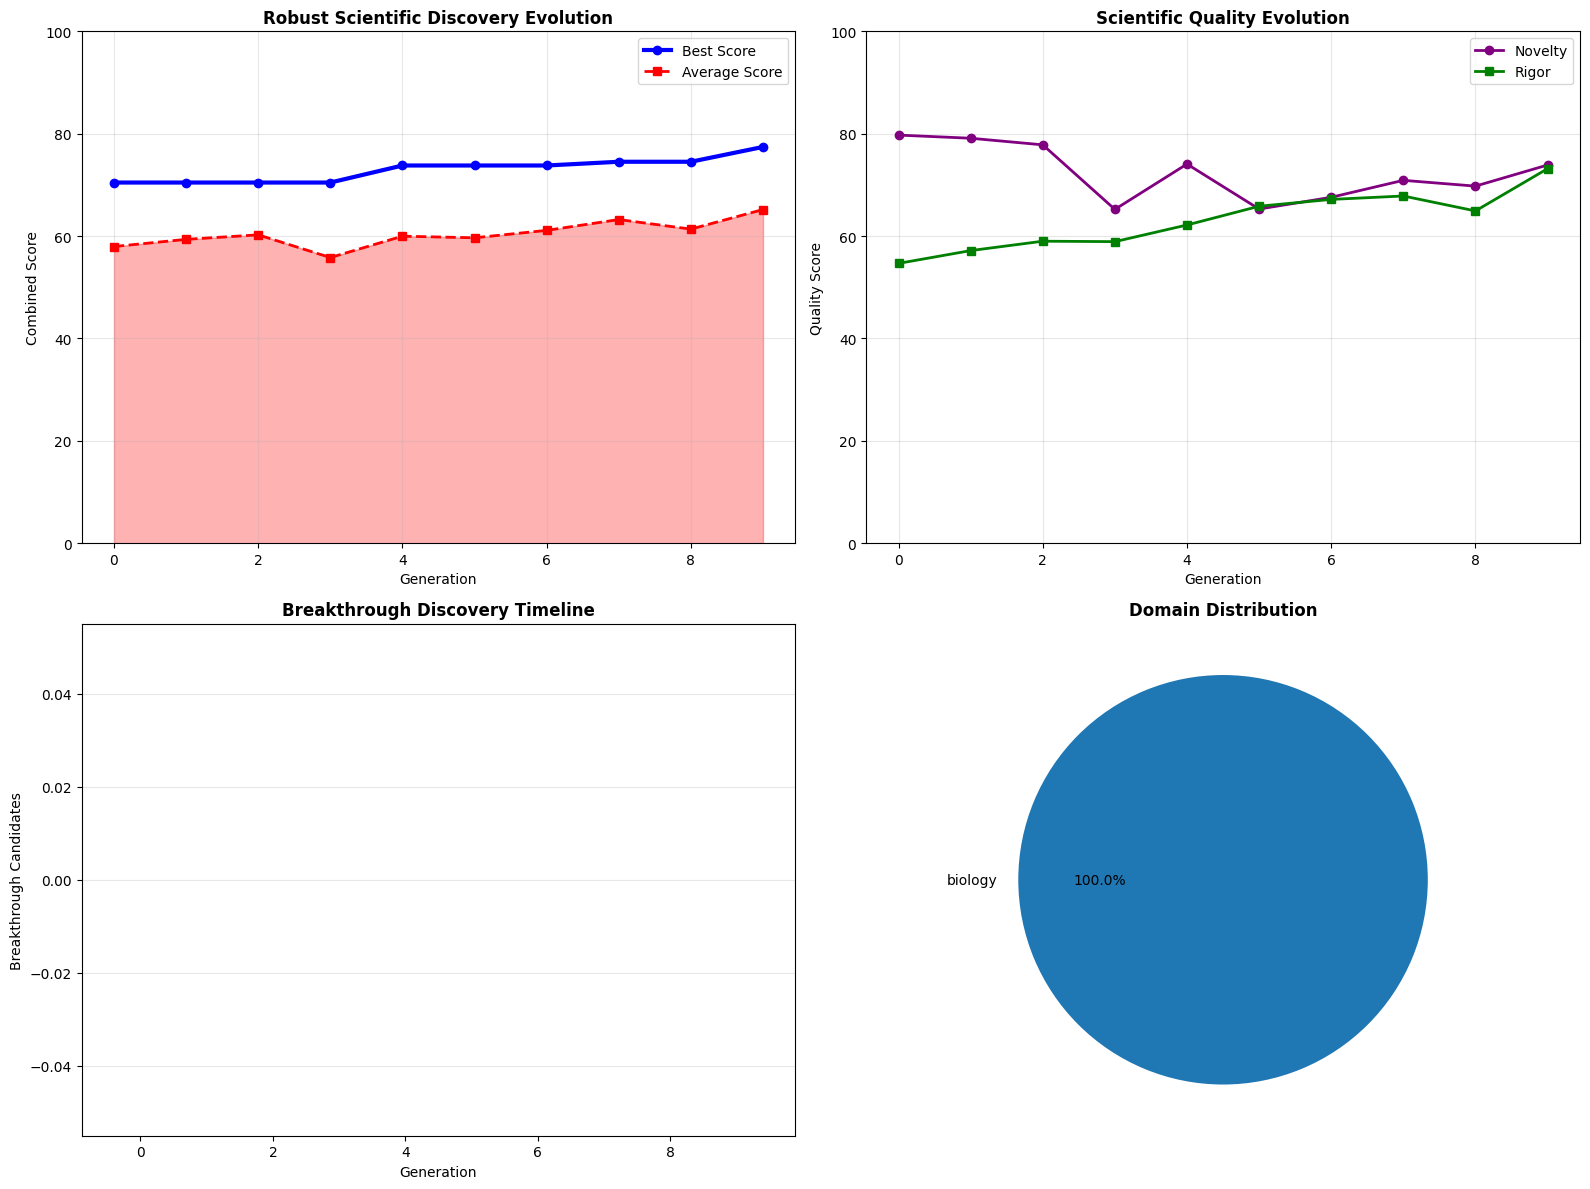


🏆 ROBUST A100-OPTIMIZED DISCOVERY RESULTS
🔥 GPU: NVIDIA A100-SXM4-40GB
🧠 Model: Qwen2.5-14B-Instruct

📊 BEST HYPOTHESIS SCORES:
   Combined Score: 77.42
   Scientific Rigor: 99.00
   Novelty Score: 74.60
   Testability Score: 55.00
   Coherence Score: 74.00

📖 BEST HYPOTHESIS:
   Hypothesis: Incorporating quantified fluctuations in neuronal nitric oxide synthase (nNOS)-derived nitricoxide (NO) levels, as biomarkers of oxidativestress, into a high-dimensional machine learningmodel will enhance predictionaccuracy of honeybeeforagingdecisions by atleast 30%, thereby elucidatingthe neuralmechanisms underlying adaptivebehavioralresponses to environmetrics.

📈 DISCOVERY STATISTICS:
   Breakthrough Candidates: 0
   Total Hypotheses: 92
   Final Population Quality: 65.19


In [ ]:
# Launch the robust system
results, system = run_robust_a100_discovery_demo()